In [35]:
# ================================================
# Importación de librerías
# ================================================
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer

# ================================================
# Carga del archivo tratado
# ================================================
df = pd.read_csv("https://raw.githubusercontent.com/KennyXen/TelecomX-2-Predicci-n-de-cancelaci-n/main/datos_tratados_transformados.csv")
print("\nDimensiones iniciales:", df.shape)
print("Vista previa de los datos:")
display(df.head())

# ================================================
# Eliminación de columnas irrelevantes
# ================================================
cols_to_drop = [col for col in df.columns if "id" in col.lower()]
print("\nColumnas eliminadas por irrelevancia:", cols_to_drop)

df.drop(columns=cols_to_drop, inplace=True, errors='ignore')
print("Dimensiones después de eliminar columnas irrelevantes:", df.shape)

# ================================================
# Encoding de variables categóricas
# ================================================
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
print("\nColumnas categóricas detectadas:", cat_cols)

# Convertir churn a binaria
if 'churn' in df.columns:
    df['churn'] = df['churn'].str.lower().replace({'yes': 1, 'no': 0, 'unknown': 0})

# One-Hot Encoding al resto de variables categóricas
df_encoded = pd.get_dummies(df, columns=[col for col in cat_cols if col != 'churn'], drop_first=True)

print("\nDimensiones después del encoding:", df_encoded.shape)
print("Vista previa del dataframe codificado:")
display(df_encoded.head())

# ================================================
# Separar variables predictoras y objetivo
# ================================================
X = df_encoded.drop('churn', axis=1)
y = df_encoded['churn']

print("\nCantidad de NaNs iniciales en X:", X.isna().sum().sum())

# ================================================
# Manejo de columnas completamente nulas
# ================================================
cols_all_nan = X.columns[X.isna().all()].tolist()
if cols_all_nan:
    print("\nColumnas completamente nulas eliminadas:", cols_all_nan)
    X.drop(columns=cols_all_nan, inplace=True)

# ================================================
# Imputación de valores nulos SOLO numéricos
# ================================================
imputer = SimpleImputer(strategy='median')
X_imputed_array = imputer.fit_transform(X)
X_imputed = pd.DataFrame(X_imputed_array, columns=X.columns)

print("Cantidad de NaNs después de imputación:", X_imputed.isna().sum().sum())
print("Dimensiones de X_imputed:", X_imputed.shape)

# ================================================
# Verificación de proporción de churn
# ================================================
print("\n=== Distribución de Churn ===")
churn_counts = y.value_counts()
print(churn_counts)
print("\nProporción de churn:")
print(churn_counts / len(y))

# ================================================
# Balanceo de clases con SMOTE
# ================================================
print("\nProporción de clase antes del balanceo:")
print(y.value_counts(normalize=True))

if y.value_counts(normalize=True).min() < 0.35:
    smote = SMOTE(random_state=42)
    X_res, y_res = smote.fit_resample(X_imputed, y)
    print("\nDimensiones después de SMOTE:", X_res.shape)
    print("Proporción de clase después de SMOTE:")
    print(y_res.value_counts(normalize=True))
else:
    print("\nNo se aplicó SMOTE porque el balance es aceptable.")
    X_res, y_res = X_imputed.copy(), y.copy()

# ================================================
# Normalización / Estandarización
# ================================================
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_res), columns=X_res.columns)

print("\n✅ Datos listos para modelado.")
print("Dimensiones finales de X:", X_scaled.shape)
print("Dimensiones finales de y:", y_res.shape)





Dimensiones iniciales: (7267, 23)
Vista previa de los datos:


,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges_monthly,charges_total,cuentas_diarias,churn_bin
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667,NaN
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667,NaN
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333,NaN
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667,NaN
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667,NaN



Columnas eliminadas por irrelevancia: ['customerid']
Dimensiones después de eliminar columnas irrelevantes: (7267, 22)

Columnas categóricas detectadas: ['churn', 'gender', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod']

Dimensiones después del encoding: (7267, 33)
Vista previa del dataframe codificado:


/tmp/ipython-input-2202431316.py:35: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['churn'] = df['churn'].str.lower().replace({'yes': 1, 'no': 0, 'unknown': 0})


,churn,seniorcitizen,tenure,charges_monthly,charges_total,cuentas_diarias,churn_bin,gender_Male,partner_Yes,dependents_Yes,...,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No internet service,streamingmovies_Yes,contract_One year,contract_Two year,paperlessbilling_Yes,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,0,0,9,65.6,593.30,2.186667,NaN,False,True,True,...,False,True,False,False,True,False,True,False,False,True
1,0,0,9,59.9,542.40,1.996667,NaN,True,False,False,...,False,False,False,True,False,False,False,False,False,True
2,1,0,4,73.9,280.85,2.463333,NaN,True,False,False,...,False,False,False,False,False,False,True,False,True,False
3,1,1,13,98.0,1237.85,3.266667,NaN,True,True,False,...,False,True,False,True,False,False,True,False,True,False
4,1,1,3,83.9,267.40,2.796667,NaN,False,True,False,...,False,True,False,False,False,False,True,False,False,True



Cantidad de NaNs iniciales en X: 7278

Columnas completamente nulas eliminadas: ['churn_bin']
Cantidad de NaNs después de imputación: 0
Dimensiones de X_imputed: (7267, 31)

=== Distribución de Churn ===
churn
0    5398
1    1869
Name: count, dtype: int64

Proporción de churn:
churn
0    0.74281
1    0.25719
Name: count, dtype: float64

Proporción de clase antes del balanceo:
churn
0    0.74281
1    0.25719
Name: proportion, dtype: float64

Dimensiones después de SMOTE: (10796, 31)
Proporción de clase después de SMOTE:
churn
0    0.5
1    0.5
Name: proportion, dtype: float64

✅ Datos listos para modelado.
Dimensiones finales de X: (10796, 31)
Dimensiones finales de y: (10796,)


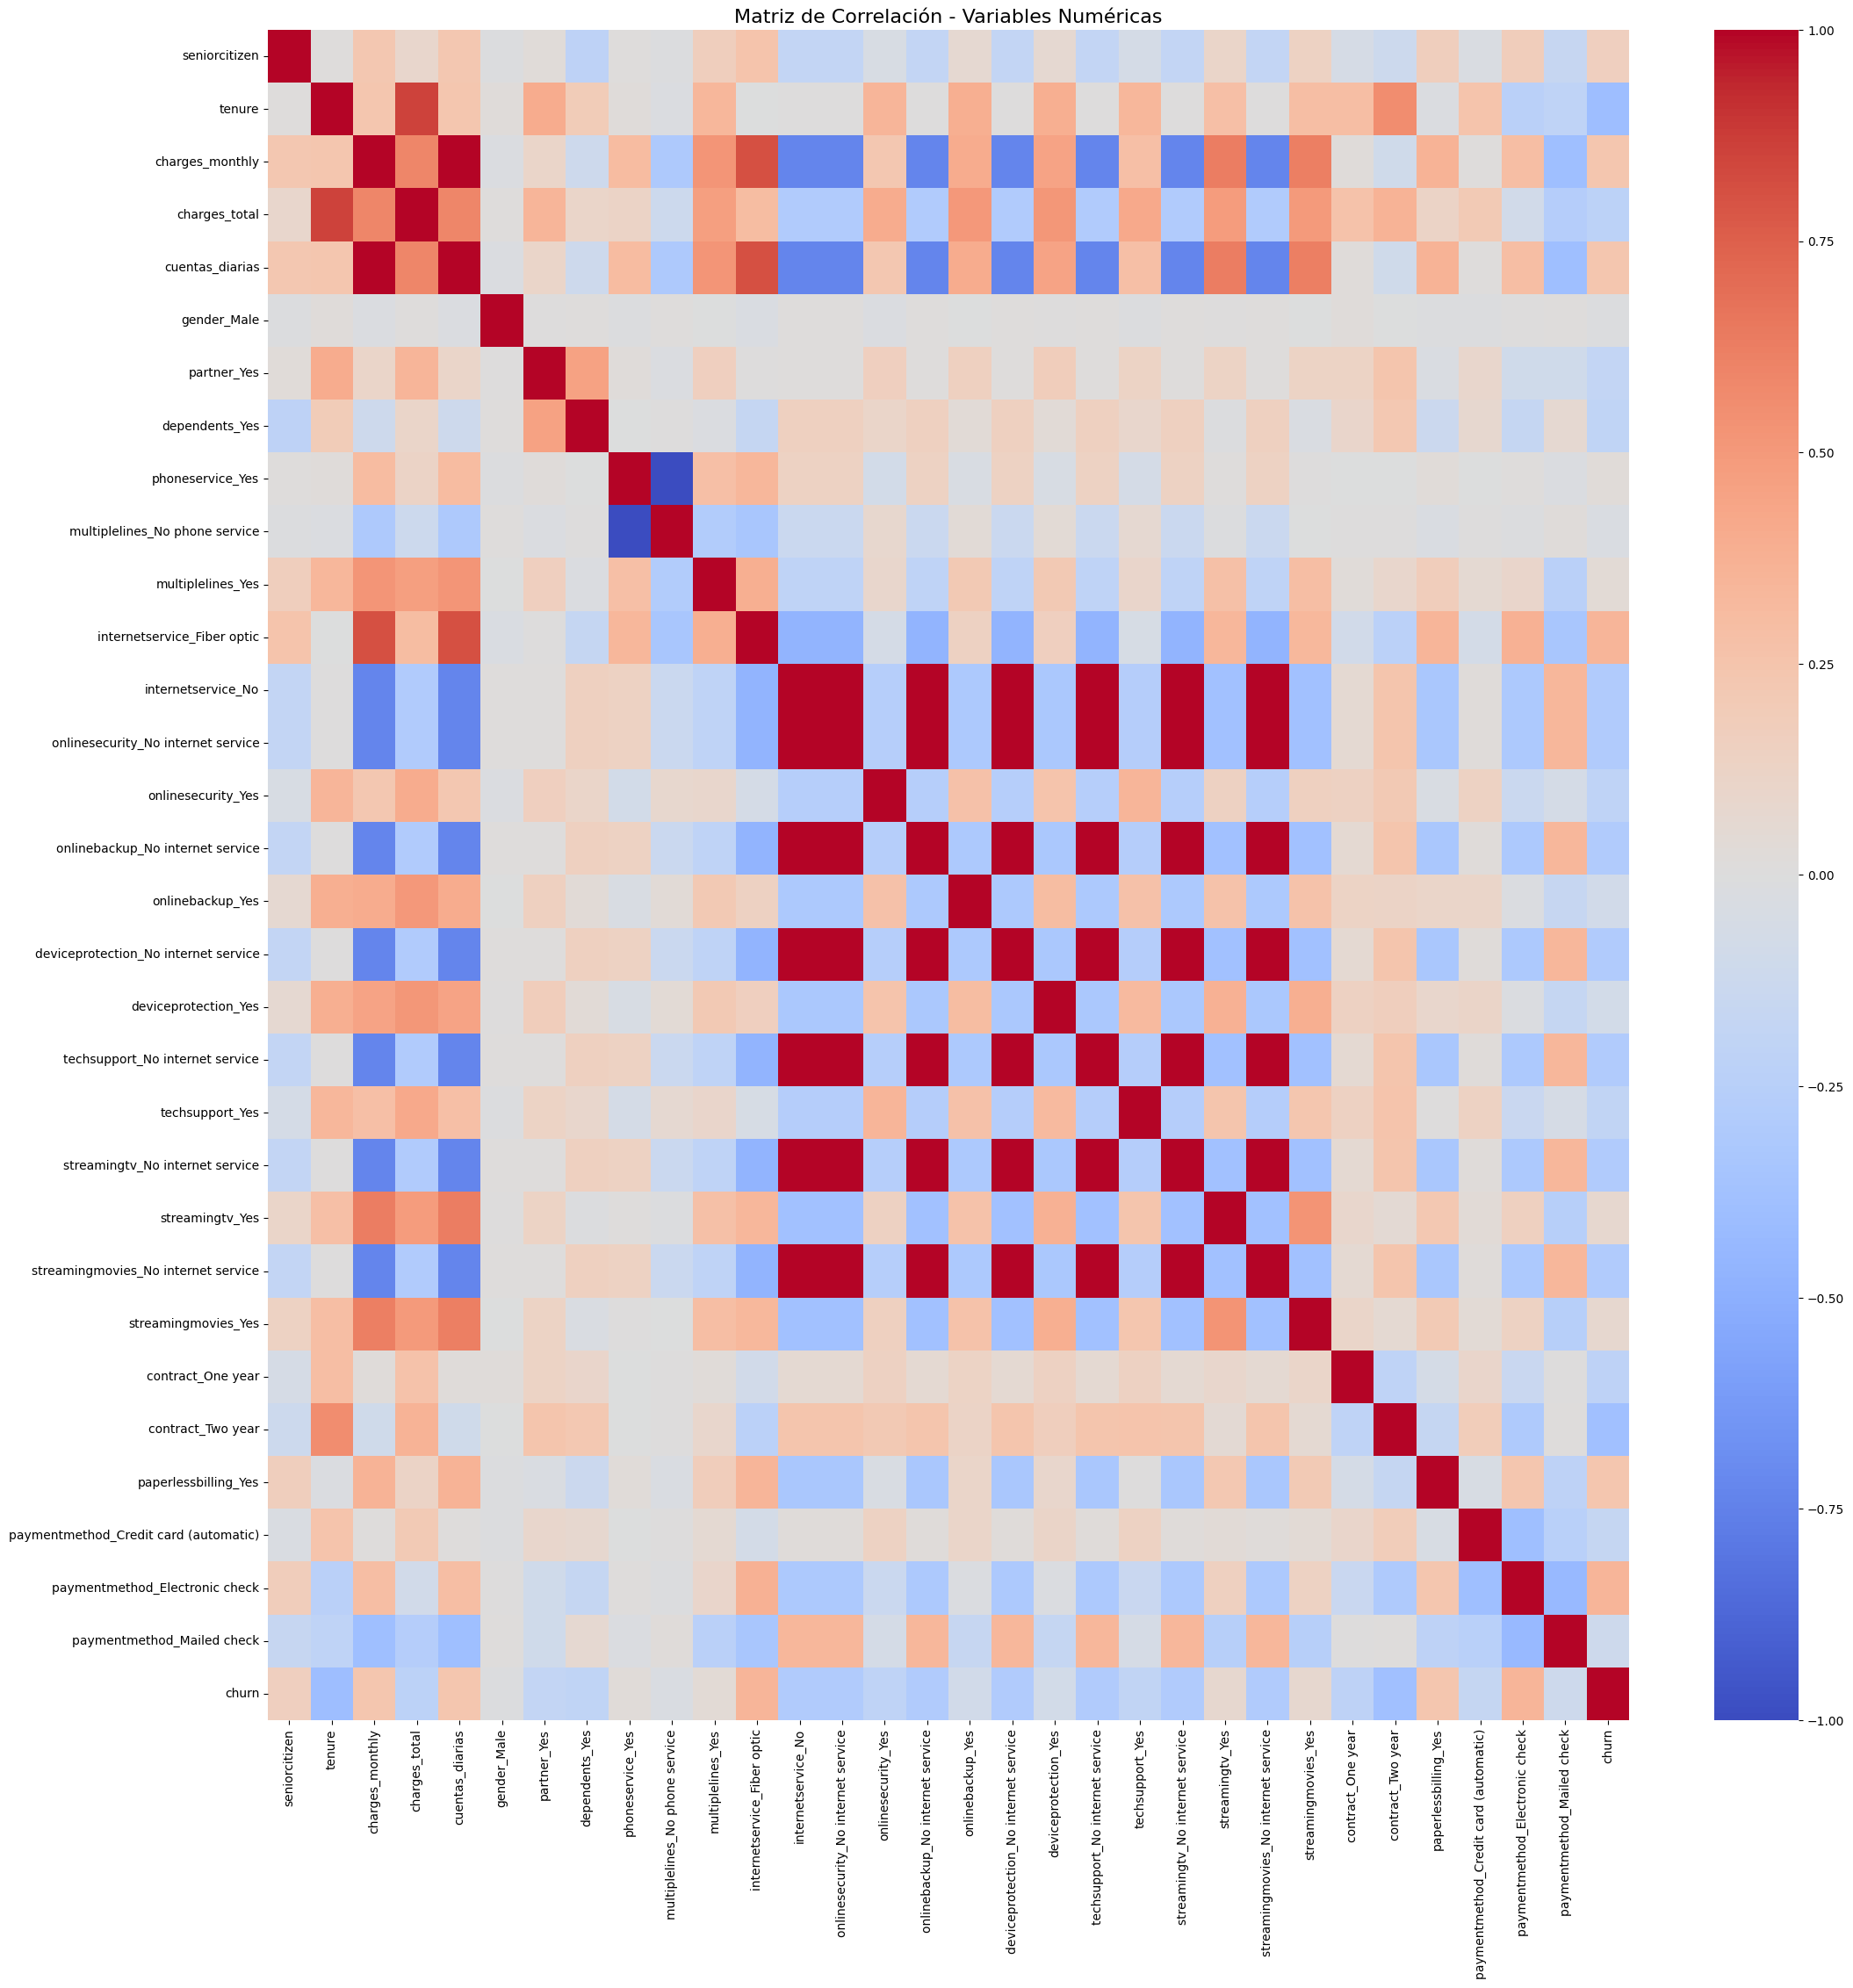


🔹 Top 10 variables más correlacionadas con la cancelación:
tenure                                  0.403599
contract_Two year                       0.387102
internetservice_Fiber optic             0.351039
paymentmethod_Electronic check          0.346590
onlinebackup_No internet service        0.290606
onlinesecurity_No internet service      0.290606
internetservice_No                      0.290606
deviceprotection_No internet service    0.290606
techsupport_No internet service         0.290606
streamingmovies_No internet service     0.290606
Name: churn, dtype: float64


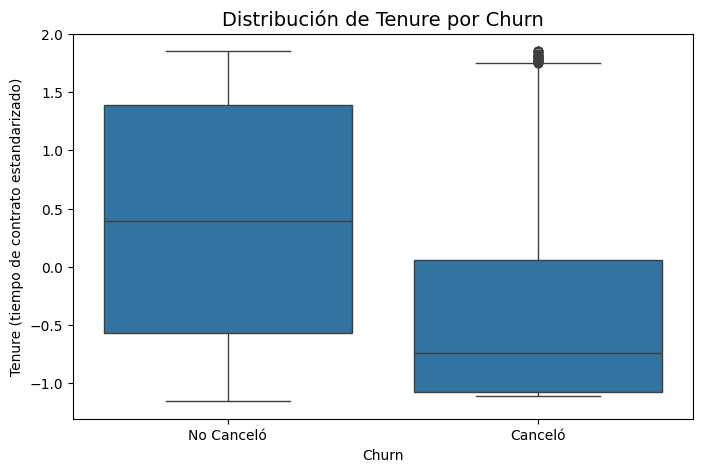

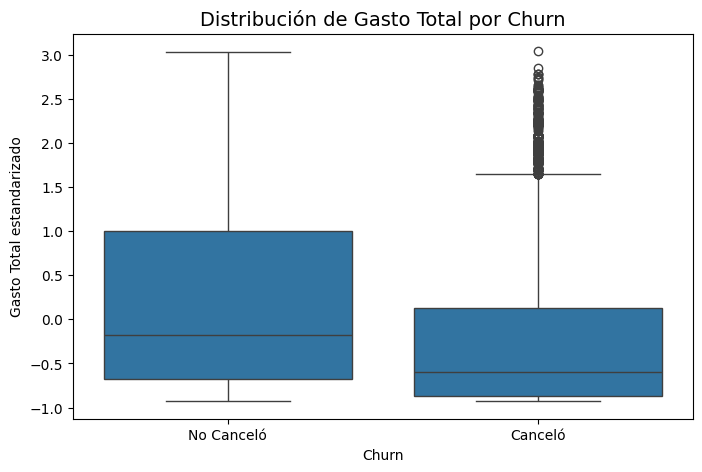


Variables candidatas para el modelo:
['tenure', 'contract_Two year', 'internetservice_Fiber optic', 'paymentmethod_Electronic check', 'onlinebackup_No internet service', 'onlinesecurity_No internet service', 'internetservice_No', 'deviceprotection_No internet service', 'techsupport_No internet service', 'streamingmovies_No internet service', 'streamingtv_No internet service', 'paperlessbilling_Yes', 'cuentas_diarias', 'charges_monthly', 'charges_total']


In [36]:
# ==========================================================
# CORRELACIÓN Y SELECCIÓN DE VARIABLES
# ==========================================================

import matplotlib.pyplot as plt
import seaborn as sns


# Si vienes de la celda anterior ya deberías tener:
# X_scaled (features escaladas) y y_res (target balanceado)

# Matriz de correlación global
plt.figure(figsize=(25,25))
Xy_scaled = X_scaled.copy()
Xy_scaled['churn'] = y_res.values

plt.title("Matriz de Correlación - Variables Numéricas", fontsize=16)
sns.heatmap(Xy_scaled.corr(), annot=False, cmap='coolwarm', center=0)
plt.show()

# Variables más correlacionadas con churn
corr_target = Xy_scaled.corr()['churn'].drop('churn').abs().sort_values(ascending=False)
print("\n🔹 Top 10 variables más correlacionadas con la cancelación:")
print(corr_target.head(10))

# Análisis dirigido

## a) Tenure vs Churn
plt.figure(figsize=(8,5))
sns.boxplot(x=y_res, y=X_scaled['tenure'])
plt.xticks([0,1], ['No Canceló', 'Canceló'])
plt.title("Distribución de Tenure por Churn", fontsize=14)
plt.xlabel("Churn")
plt.ylabel("Tenure (tiempo de contrato estandarizado)")
plt.show()

## b) Gasto Total vs Churn
plt.figure(figsize=(8,5))
sns.boxplot(x=y_res, y=X_scaled['charges_total'])
plt.xticks([0,1], ['No Canceló', 'Canceló'])
plt.title("Distribución de Gasto Total por Churn", fontsize=14)
plt.xlabel("Churn")
plt.ylabel("Gasto Total estandarizado")
plt.show()

# Selección inicial de variables candidatas
top_features = corr_target.head(15).index.tolist()

print("\nVariables candidatas para el modelo:")
print(top_features)


Tamaño del set de entrenamiento: (7557, 31)
Tamaño del set de prueba: (3239, 31)

=== Regresión Logística ===
Accuracy : 0.7644
Precisión: 0.7443
Recall   : 0.8054
F1-score : 0.7737


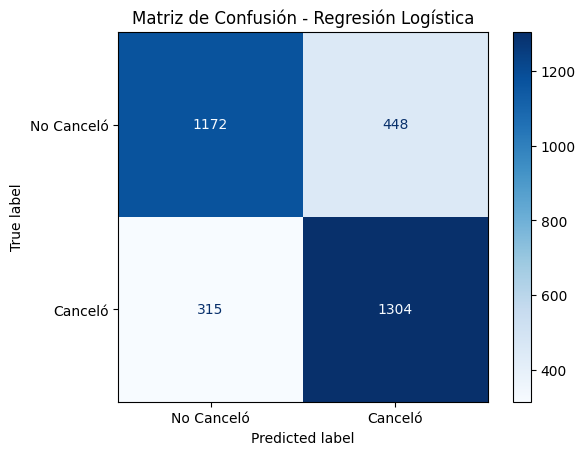


=== Random Forest ===
Accuracy : 0.8574
Precisión: 0.8701
Recall   : 0.8400
F1-score : 0.8548


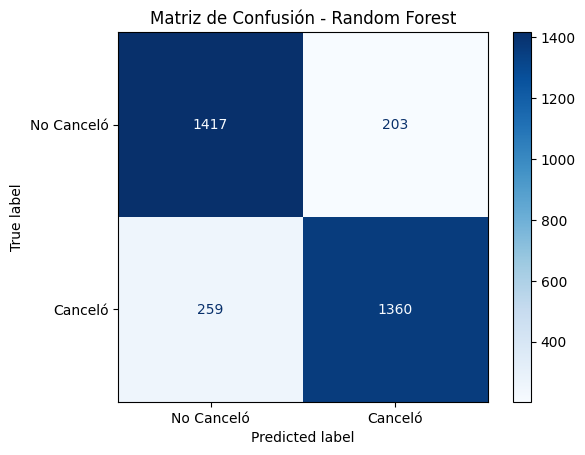


=== Comparación de modelos ===


,Modelo,Accuracy,Precision,Recall,F1-Score
1,Random Forest,0.857363,0.870122,0.840025,0.854808
0,Regresión Logística,0.764433,0.744292,0.805435,0.773658


In [37]:
# ==========================================================
# PARTE 3: MODELADO PREDICTIVO (CORREGIDO)
# ==========================================================


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# -----------------------------------------------------------------
# Separación de datos en entrenamiento y prueba
# -----------------------------------------------------------------
# Usamos X_scaled para Regresión Logística (normalizado)
# Usamos X_res (sin escalar) para Random Forest
# Ambos tienen 10796 filas tras SMOTE

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(
    X_scaled, y_res, test_size=0.3, random_state=42, stratify=y_res
)

X_train, X_test, _, _ = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

print("Tamaño del set de entrenamiento:", X_train.shape)
print("Tamaño del set de prueba:", X_test.shape)

# -----------------------------------------------------------------
# Entrenamiento de modelos
# -----------------------------------------------------------------

# Modelo 1: Regresión Logística (usa datos normalizados)
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

# Modelo 2: Random Forest (no requiere normalización)
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# -----------------------------------------------------------------
# Evaluación de modelos
# -----------------------------------------------------------------
def evaluar_modelo(nombre, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"\n=== {nombre} ===")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precisión: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1-score : {f1:.4f}")

    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Canceló","Canceló"])
    disp.plot(cmap='Blues')
    plt.title(f"Matriz de Confusión - {nombre}")
    plt.show()

    return acc, prec, rec, f1

# Evaluación de ambos modelos
metrics = []
metrics.append(["Regresión Logística", *evaluar_modelo("Regresión Logística", y_test, y_pred_log)])
metrics.append(["Random Forest", *evaluar_modelo("Random Forest", y_test, y_pred_rf)])

# -----------------------------------------------------------------
# 4️⃣ Comparación de resultados
# -----------------------------------------------------------------
metrics_df = pd.DataFrame(metrics, columns=["Modelo","Accuracy","Precision","Recall","F1-Score"])
print("\n=== Comparación de modelos ===")
display(metrics_df.sort_values(by="F1-Score", ascending=False))




=== Top 15 variables más importantes (Random Forest) ===


,Variable,Importancia
3,charges_total,0.109290
1,tenure,0.104497
29,paymentmethod_Electronic check,0.090605
4,cuentas_diarias,0.080122
2,charges_monthly,0.077402
26,contract_Two year,0.056745
11,internetservice_Fiber optic,0.044993
27,paperlessbilling_Yes,0.043214
14,onlinesecurity_Yes,0.043006
20,techsupport_Yes,0.041683


/tmp/ipython-input-1918757024.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importancia', y='Variable', data=feat_imp.head(15), palette='viridis')


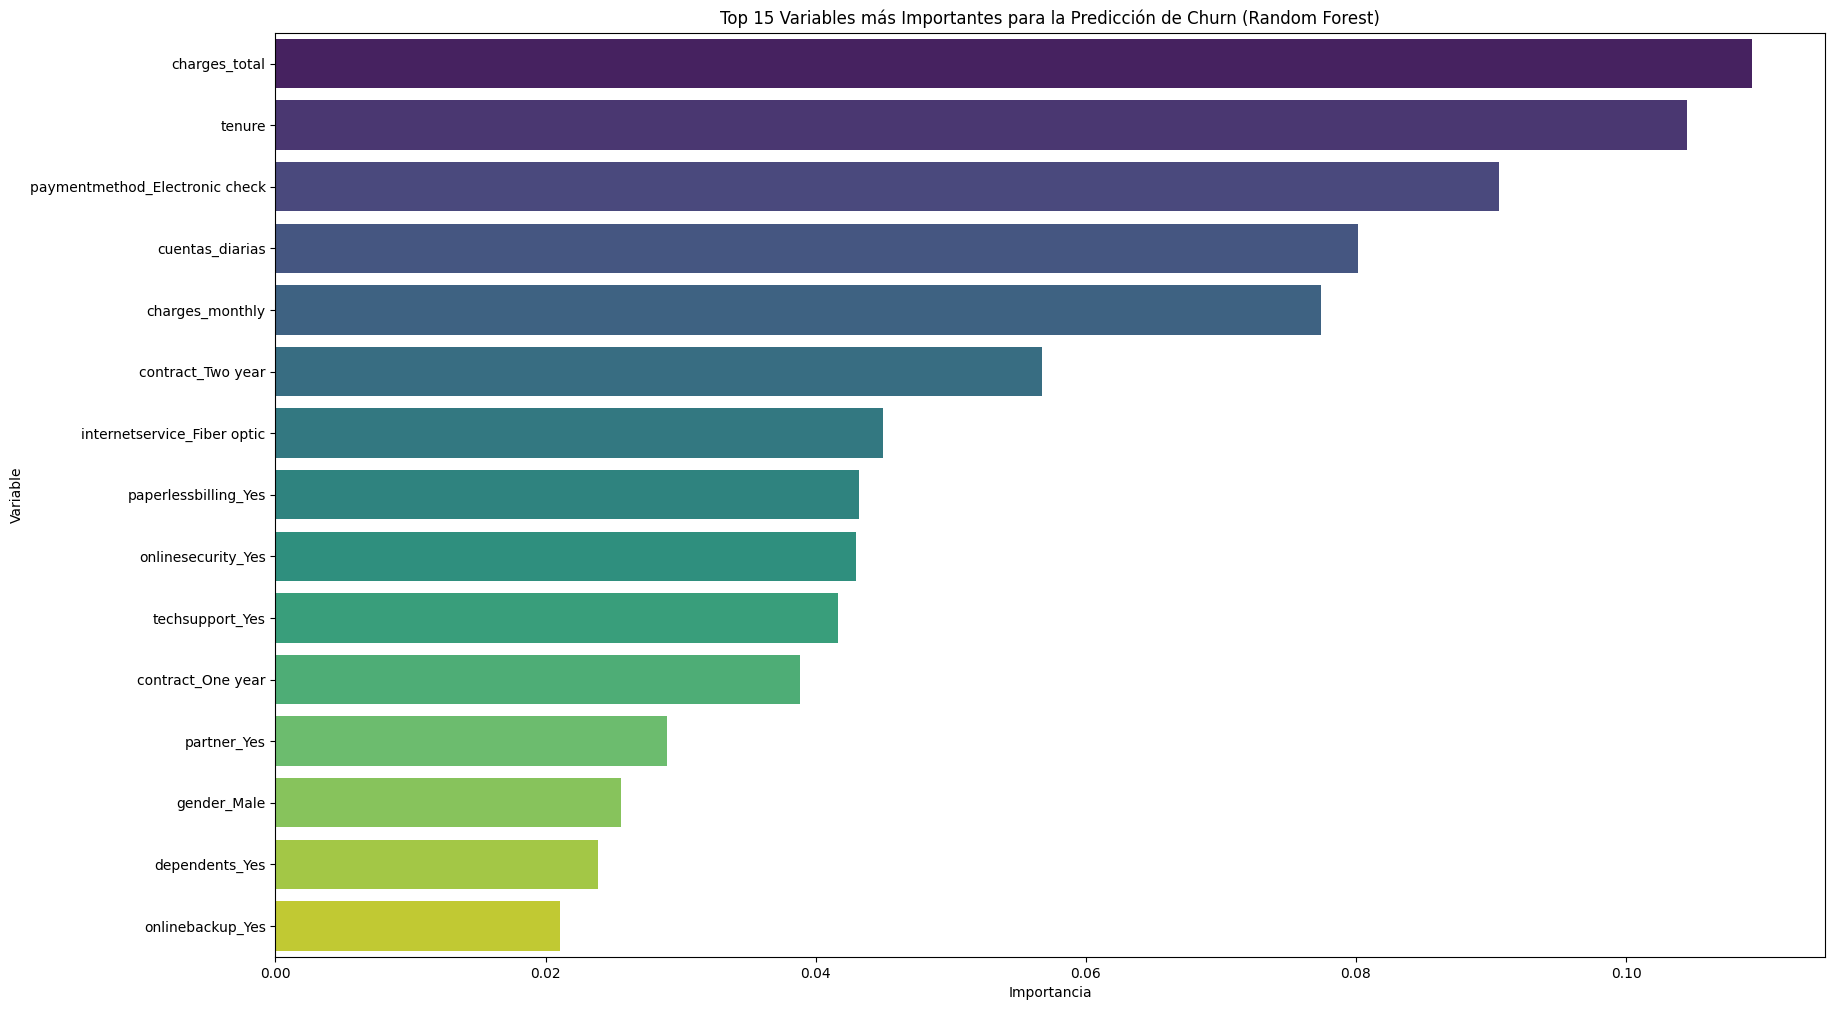


=== Top 10 variables con efecto positivo en Churn (Mayor riesgo) ===


,Variable,Coeficiente
11,internetservice_Fiber optic,0.849000
3,charges_total,0.839592
22,streamingtv_Yes,0.319063
24,streamingmovies_Yes,0.293906
10,multiplelines_Yes,0.217700
29,paymentmethod_Electronic check,0.197080
27,paperlessbilling_Yes,0.171282
0,seniorcitizen,0.110112
18,deviceprotection_Yes,0.066346
8,phoneservice_Yes,0.045541



=== Top 10 variables con efecto negativo en Churn (Mayor retención) ===


,Variable,Coeficiente
15,onlinebackup_No internet service,-0.099795
17,deviceprotection_No internet service,-0.099795
21,streamingtv_No internet service,-0.099795
23,streamingmovies_No internet service,-0.099795
14,onlinesecurity_Yes,-0.110076
25,contract_One year,-0.256129
26,contract_Two year,-0.571057
2,charges_monthly,-0.611123
4,cuentas_diarias,-0.611123
1,tenure,-1.480593



=== Conclusiones Estratégicas para Telecom X ===

1️⃣ Random Forest logró mejor desempeño con un F1-Score de 0.85, adecuado para identificar clientes en riesgo.
2️⃣ Variables más influyentes (Random Forest) incluyen Tenure, tipo de contrato, tipo de internet y método de pago.
3️⃣ Clientes con contratos cortos (Month-to-Month), Internet de Fibra Óptica y pago con 'Electronic Check' presentan mayor riesgo de churn.
4️⃣ Los clientes de larga permanencia y con contratos de 1-2 años presentan mayor estabilidad.
5️⃣ Estrategia recomendada: Ofrecer promociones o descuentos a clientes de contratos mensuales,
   especialmente los que usan 'Electronic Check' y tienen Fibra Óptica, para fomentar su permanencia.


In [38]:
# ==========================================================
# PARTE 4: INTERPRETACIÓN Y CONCLUSIONES
# ==========================================================

# ----------------------------------------------------------
# Análisis de importancia de variables - Random Forest
# ----------------------------------------------------------

importances = rf_model.feature_importances_
features = X_res.columns
feat_imp = pd.DataFrame({
    'Variable': features,
    'Importancia': importances
}).sort_values(by='Importancia', ascending=False)

print("\n=== Top 15 variables más importantes (Random Forest) ===")
display(feat_imp.head(15))

# Gráfico de importancia
plt.figure(figsize=(20,12))
sns.barplot(x='Importancia', y='Variable', data=feat_imp.head(15), palette='viridis')
plt.title('Top 15 Variables más Importantes para la Predicción de Churn (Random Forest)')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.savefig("Importancia de Variables RF.png")
plt.show()

# ----------------------------------------------------------
# Análisis de coeficientes - Regresión Logística
# ----------------------------------------------------------

coefs = pd.DataFrame({
    'Variable': X_scaled.columns,
    'Coeficiente': log_reg.coef_[0]
}).sort_values(by='Coeficiente', ascending=False)

print("\n=== Top 10 variables con efecto positivo en Churn (Mayor riesgo) ===")
display(coefs.head(10))

print("\n=== Top 10 variables con efecto negativo en Churn (Mayor retención) ===")
display(coefs.tail(10))

# ----------------------------------------------------------
# Conclusiones estratégicas
# ----------------------------------------------------------

print("\n=== Conclusiones Estratégicas para Telecom X ===\n")
print("1️⃣ Random Forest logró mejor desempeño con un F1-Score de 0.85, adecuado para identificar clientes en riesgo.")
print("2️⃣ Variables más influyentes (Random Forest) incluyen Tenure, tipo de contrato, tipo de internet y método de pago.")
print("3️⃣ Clientes con contratos cortos (Month-to-Month), Internet de Fibra Óptica y pago con 'Electronic Check' presentan mayor riesgo de churn.")
print("4️⃣ Los clientes de larga permanencia y con contratos de 1-2 años presentan mayor estabilidad.")
print("5️⃣ Estrategia recomendada: Ofrecer promociones o descuentos a clientes de contratos mensuales,")
print("   especialmente los que usan 'Electronic Check' y tienen Fibra Óptica, para fomentar su permanencia.")
